# Final Project from "Artificial Intelligence" - Zeljko Stojkovic 2021230319

## Dataset:
The project is centered around the "Telco Customer Churn" dataset, which contains valuable information related to customer churn within the telecom industry.

## Project Objective:
The primary goal of this project is to use artificial intelligence, specifically logistic regression, to predict customer churn. By analyzing a range of customer attributes and behaviors. We're going to look at various things about the customers to see what's making them leave.

## Dataset Contents:
There are 7043 customers in the dataset and 19 features without CustomerID (non-informative) and Churn column(target variable). Most of the categorical features have 4 or less unique values

This dataset includes information about:
- Churn - Customers who departed in the past month
- Customer Service Subscriptions - includes phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies
 - Account Details - customer duration, contract type, payment method, paperless billing status, monthly fees, and total charges
- Demographic Customer Information - covering gender, age, marital status, and presence of dependents

#### We have 2 types of features in this dataset: categorical and numerical. Most of the feature names are self-explentory, except for:
- Partner: whether the customer has a partner or not (Yes, No)
- Dependents: whether the customer has dependents or not (Yes, No)
- OnlineBackup: whether the customer has online backup or not(Yes, No)
- Tenure: number of motnths the customer has stayed with the company
- MonthlyCharges: the amount charged to the customer monthly
- TotalCharges: the amount charged to the customer

## Exploratory Data Analysis (EDA):
### Loading the dataset:
Before we can start, we must first import the required libraries and modules which will be used for this EDA, as well as import the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
#Read data
df = pd.read_csv('telco-chrun.csv')

### 1. Analyzing the dataset:

The next step will be general analysis of the dataset.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Numbers of rows and columns in the dataset
df.shape

(7043, 21)

In [5]:
# Name of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Detailed information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check if there are any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### As we can see, there are no missing values in this dataset. 

In [8]:
# Print out the number of unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
col=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
for i in col:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print()

gender
['Female' 'Male']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4



### 1.1. Data Cleaning
In the data cleaning phase we've observed a few important issues that require to be fixed. The "TotalCharges" attribute is currently label as an object data type even thought it should be of type float. Additionaly in the "MultipleLines" attribute, we've identified three distict values 'Yes', 'No' and 'No phone service'. Howevery 'No' and 'No phone service' convey the same information.

In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [11]:
df['TotalCharges'].dtype

dtype('float64')

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### After converting the "TotalCharges" attribute from an object to a float datatype, we've identified that there are 11 missing values in this column.
##### To solve problem of missing data in TotalCharges column we can fill it with mean.

In [13]:
## This code will replace the missing values in the colum with the mean of the non-missing values.
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1.2. Data Visualization
In the data visualization phase, we use graphical representation to gain insights from the dataset. V Visualizing the data helps us understand its distribution, relationships. This step is crucial for uncovering patterns and anomalies.

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

In [15]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [16]:
# correlation between variables
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


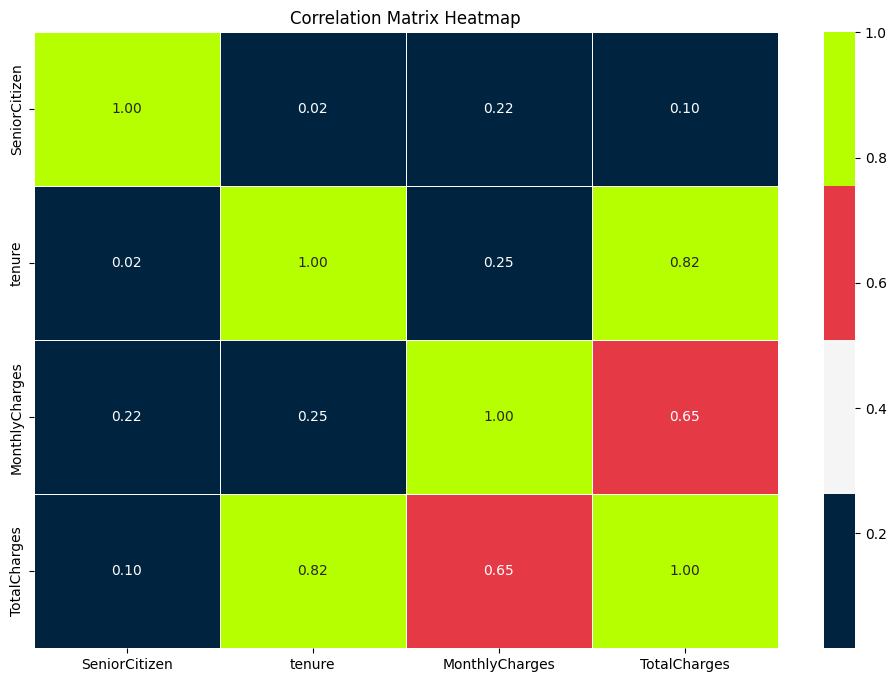

In [95]:
numeric_cols = df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

custom_colors = ['#00233f', '#f5f5f5', '#e63946', '#b5ff00']

custom_cmap = sns.color_palette(custom_colors)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


- count: Number of instances
- mean: The mean (total sum of values / total count)
- std: Standard Deviation (square root of its variance)
- min: The smallest value in the category
- x%: The value at xth percentile (25%, 50%, 75%)
- max: The largest value in the category

### 1.2.1 Numerical features distribution
Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

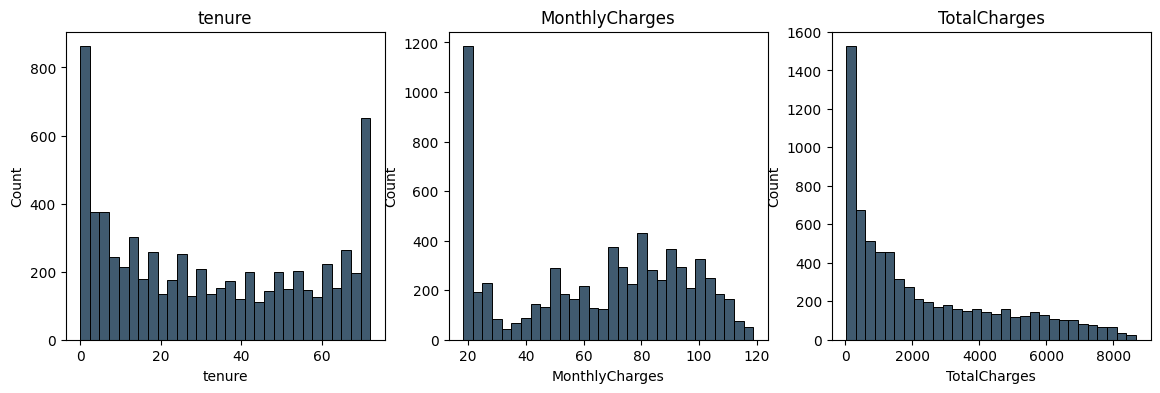

In [18]:
plt.figure(figsize=(14, 4))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)  
    sns.histplot(data=df, x=feature, bins=30, color="#00233f")
    plt.title(feature)

plt.show()

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

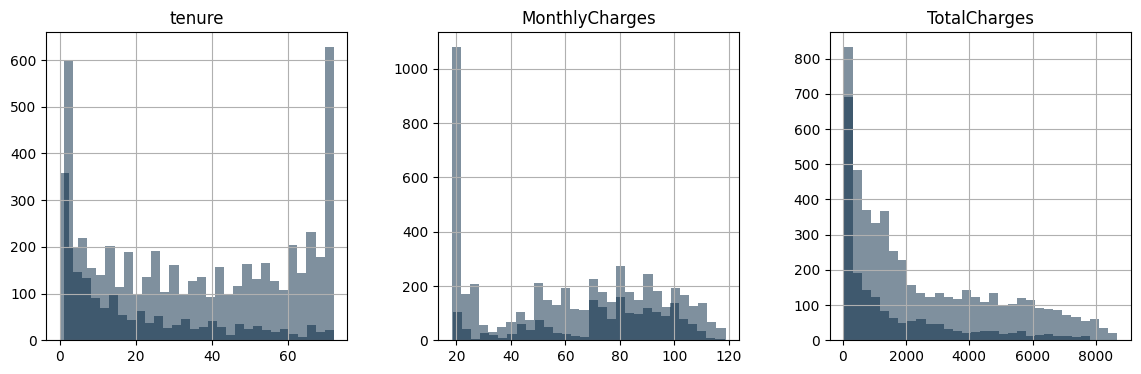

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="#00233f", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="#00233f", alpha=0.5, ax=ax)

#### We look at distributions of numerical features in relation to the target variable.                                                    We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

### 1.2.2 Categorical feature distribution
To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

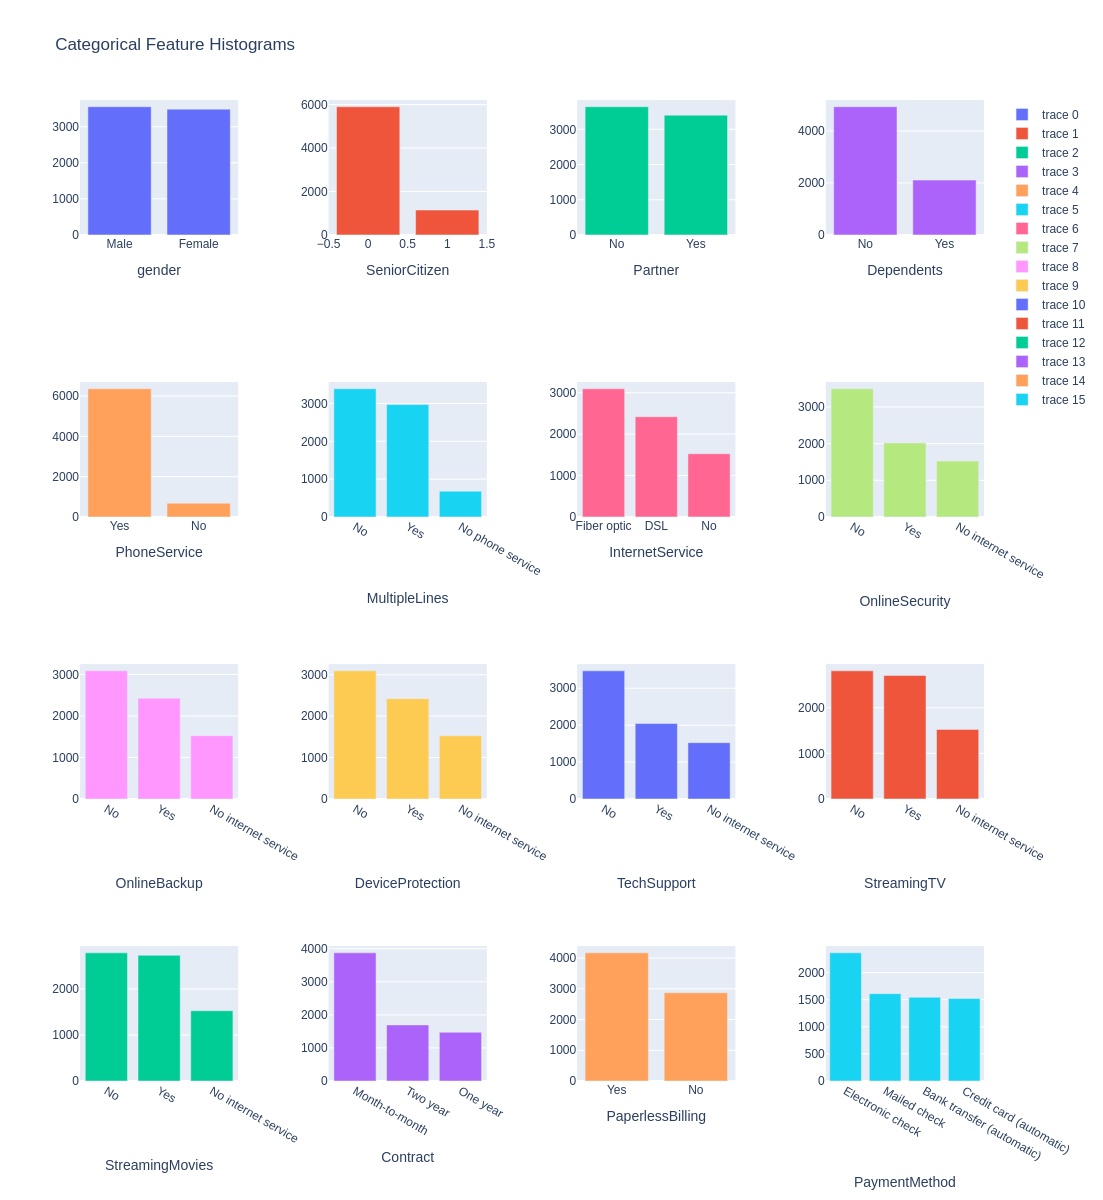

In [80]:
fig = make_subplots(rows=4, cols=4,
                    horizontal_spacing=0.1, vertical_spacing=0.15)

for i, categorical_feature in enumerate(categorical_features):
    row = (i // 4) + 1
    col = (i % 4) + 1
    hist_data = df[categorical_feature].value_counts()
    hist = go.Bar(x=hist_data.index, y=hist_data.values)
    fig.add_trace(hist, row=row, col=col)
    fig.update_xaxes(title_text=categorical_feature, row=row, col=col)

fig.update_layout(title="Categorical Feature Histograms")
fig.update_layout(height=1200, width=1500) 
fig.show()


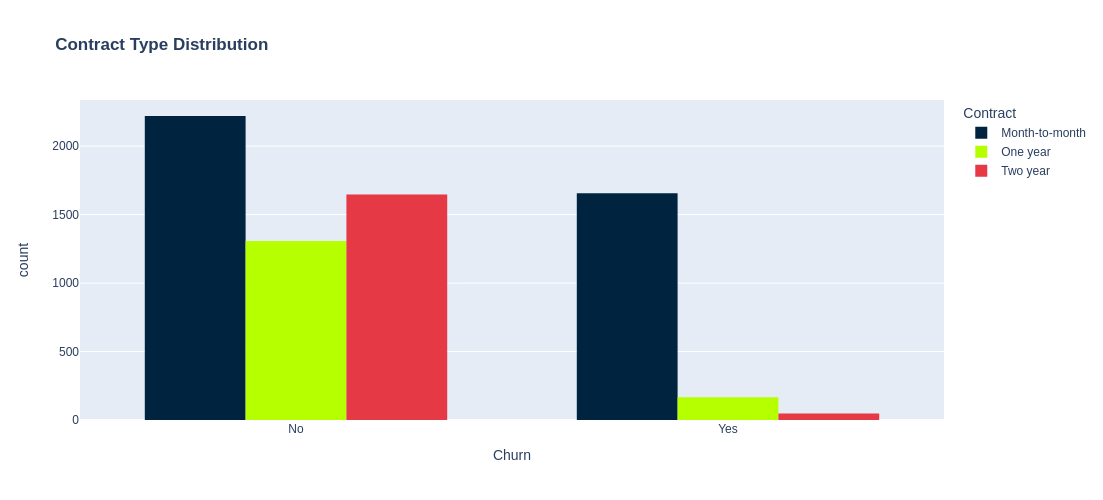

In [92]:
color_discrete_map = {
    "Month-to-month": "#00233f",
    "One year": "#b5ff00",
    "Two year": "#e63946"
}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Contract Type Distribution<b>", color_discrete_map=color_discrete_map)
fig.update_layout(width=1000, height=500, bargap=0.3)
fig.show()

Approximately 75% of customers with Month-to-Month Contracts choose to leave the service, compared to 13% of customers wtih One-YearContracts and 3% with Two-Year Contracts. This suggest that customers with Month-to-Month contracts are more likely to churn.

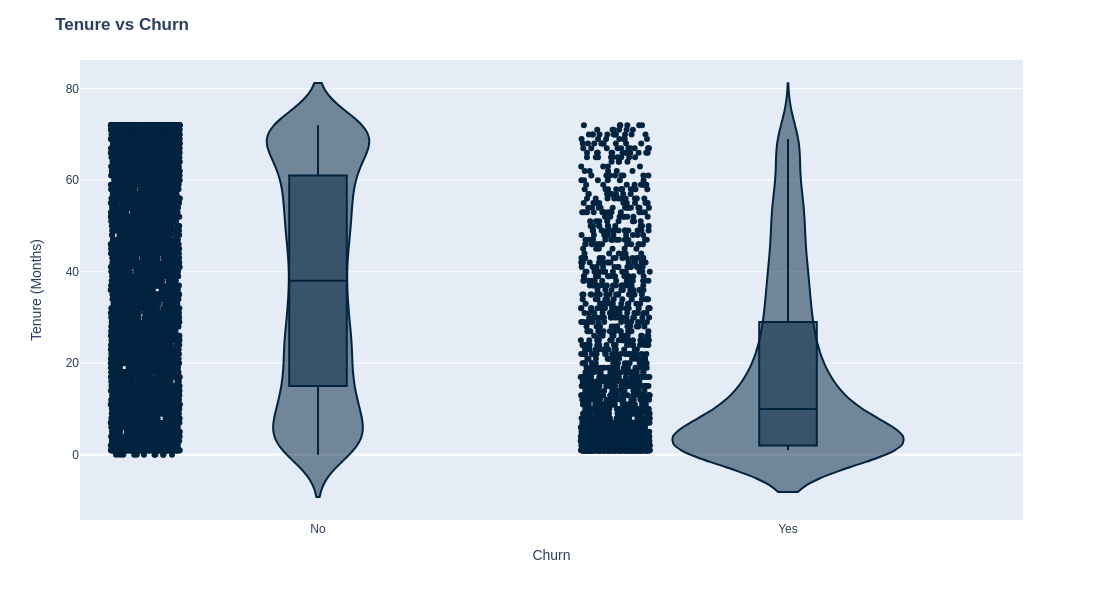

In [93]:
custom_colors = ["#00233f", "#00233f"]

fig = px.violin(df, x='Churn', y='tenure', box=True, points="all", color_discrete_sequence=custom_colors)
fig.update_yaxes(title_text='Tenure (Months)')
fig.update_xaxes(title_text='Churn')

fig.update_layout(autosize=True, width=750, height=600, title_font=dict(size=25, family='Courier'), title='<b>Tenure vs Churn</b>')

fig.show()

New customers are more likely to churn. The plot shows that the density is higher at lower tenure values for the "Chrun:Yes" category, indicating a higher chrun rate among new customers.

### 1.2.3. Target value distribution


<Axes: xlabel='Churn'>

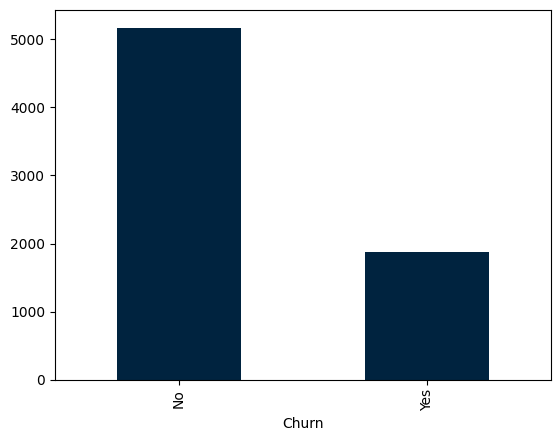

In [96]:
df[target].value_counts().plot(kind='bar', color="#00233f")

The dataset is unbalanced in a near about 3 : 1.

Few things we can do to minimize the influence of imbalanced dataset:

- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

##  2. Cleaning and Transforming Data

### 2.1. Outliers Analysis with IQR Method

- Outliers, or extreme values, are individual data pointers within a dataset that significantly differ from the majority of other values.\
- Interquartile Range method is a common statistical technique for identifiying and handling outliers in a dataset. It involves using the quartilies of a dataset to determine the range within which typical data points should fall.
- Data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

In [98]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
    ## Finds the Interquartile Range
        IQR = q3 -q1
        global LLP
        global ULP
    ## Finds the Upper and Lower Bounds
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


In [100]:
df.drop(['customerID'],axis = 1,inplace = True)

In [101]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [104]:
df_transformed = df.copy()

### 2.2. Encoding Data
All categorical variables must be encoded beofre they can be used for training and predictions

In [105]:
columns1 = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']

In [106]:
    if i == 'gender':
        df_transformed[i] = df_transformed[i].map({'Female': 0, 'Male': 1})
    else:
        df_transformed[i] = df_transformed[i].map({'Yes': 1, 'No':0})

In [107]:
columns2 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [108]:
df_transformed = pd.get_dummies(df_transformed, columns = columns2)

In [109]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()

In [110]:
df1 = df_transformed.copy()

for i in df_transformed.columns:
    df1[i] = lenc.fit_transform(df_transformed[i])

In [111]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,74,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,0,3624,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,0,536,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,0,3570,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,0,674,1,...,1,0,0,1,0,0,0,0,1,0


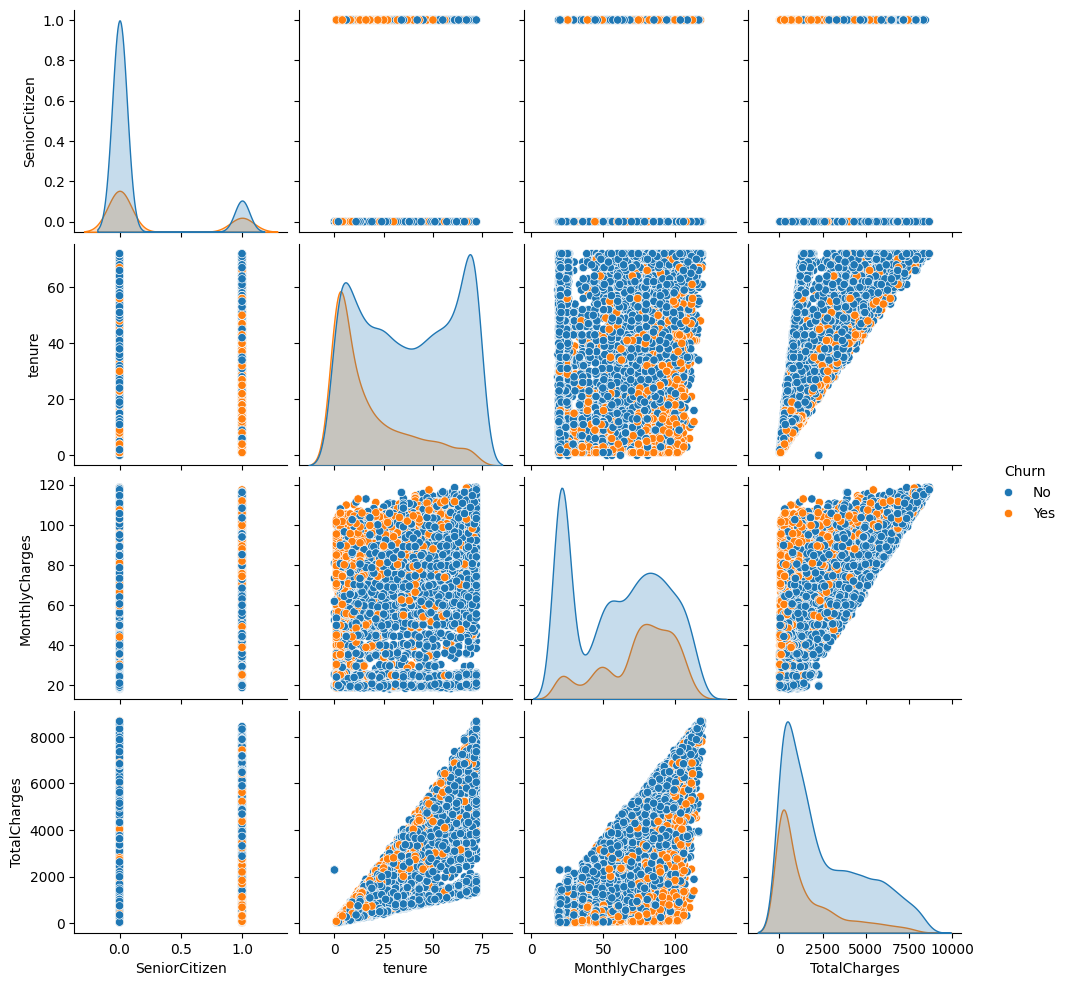

In [117]:
sns.pairplot(df, hue='Churn')

### 2.3 Splitting into features and target


In [118]:
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 2)

In [123]:
# Display the shapes of the training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 40)
(1409, 40)
(5634,)
(1409,)


## 3. Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
churn_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [126]:
churn_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [127]:
pred = churn_model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
import sklearn.metrics as sm
accuracy = sm.accuracy_score(y_test, pred)
accuracy

0.8119233498935415

In [129]:
from sklearn.metrics import confusion_matrix as cm
conf = cm(y_test, pred)
print(conf)

[[976  85]
 [180 168]]


In [130]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1061
           1       0.66      0.48      0.56       348

    accuracy                           0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



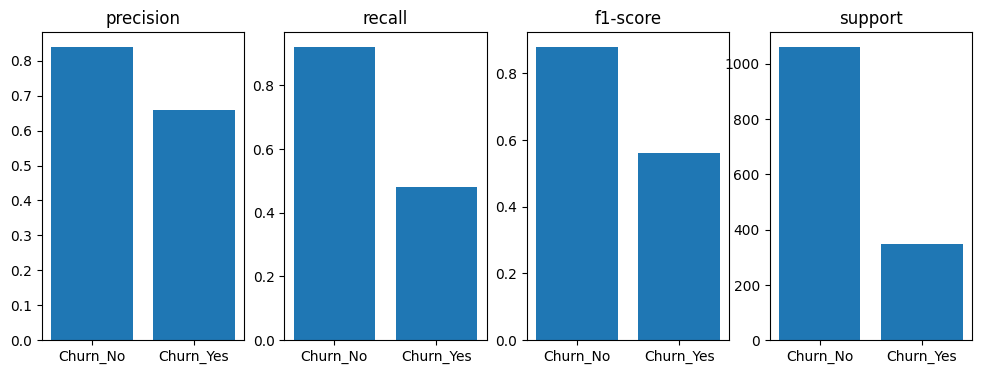

In [136]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
report = classification_report(y_test, pred, target_names=['Churn_No', 'Churn_Yes'])

# Split the report into lines
lines = report.split('\n')

# Split each line into parts
parts = [line.split() for line in lines[2:-5]]

# Extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# Create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# Display the plot
plt.show()